In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#  Import necessary tools.
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:", tf.__version__)
print("TF_hub version:", hub.__version__)


# Check for GUP availability
print('GPU', 'available (YESS)' if tf.config.list_physical_devices('GPU') else 'not available !')


TF version: 2.12.0
TF_hub version: 0.13.0
GPU available (YESS)


In [ ]:
# Basic import
import pandas as pd
import numpy as np

In [ ]:
labels_csv = pd.read_csv('/content/drive/My Drive/')
labels_csv.describe()

,target
count,5216.000000
mean,0.742906
std,0.437073
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
labels_csv.shape

(5216, 2)

In [ ]:
labels_csv['target'].value_counts()

1    3875
0    1341
Name: target, dtype: int64

Text(0, 0.5, 'No of peoples')

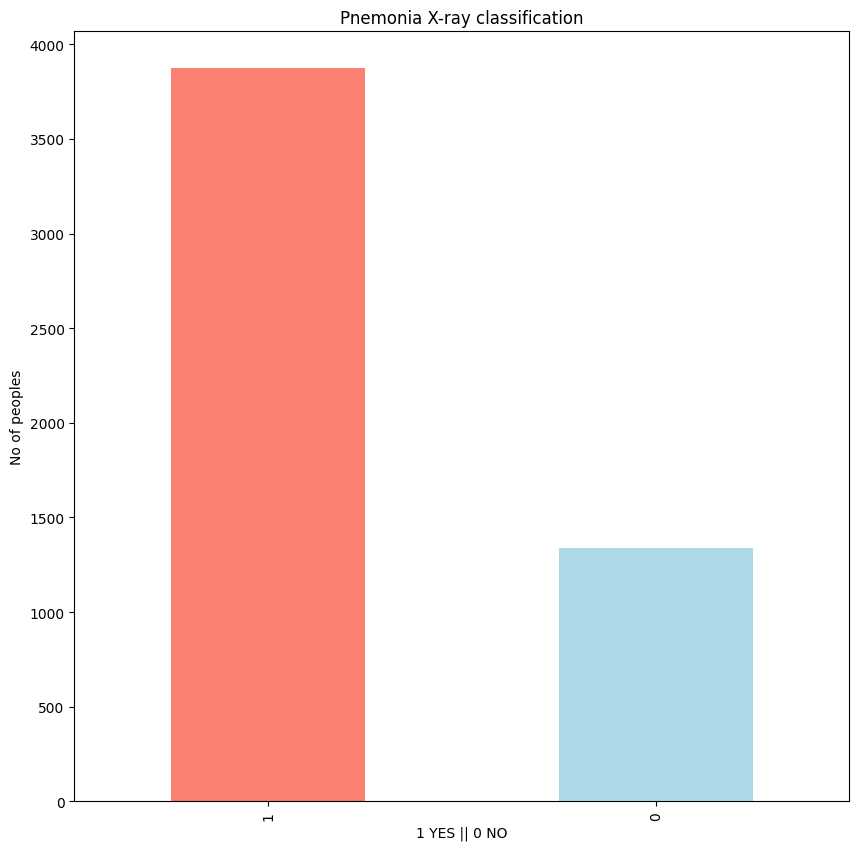

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
labels_csv['target'].value_counts().plot.bar(figsize=(10,10), color=['salmon', 'lightblue'])
plt.title('Pnemonia X-ray classification')
plt.xlabel('1 YES || 0 NO')
plt.ylabel('No of peoples')

In [ ]:
#target = list(map(lambda x: True if x is 1 else False, labels_csv.target))

In [ ]:
targets = labels_csv['target'].to_numpy()
targets

array([1, 1, 1, ..., 0, 1, 0])

In [ ]:
# Convert the labels_csv's target column to numpy
targets = labels_csv['target'].to_numpy()
# Create a unique set of breeds eg: (0,1)
uniqueTarget = np.unique(targets)
# Changing into boolean values
# boolean_target = [target == [0 , 1] for target in targets]
boolean_target = [target == uniqueTarget for target in targets]

In [ ]:
len(boolean_target)

5216

## Getting the filepath form the labels_csv


In [ ]:
filename = ['/content/drive/My Drive/Pnemonia classification/traindata/' + name for name in labels_csv['id']]
filename[:10]

['/content/drive/My Drive/Pnemonia classification/traindata/person337_bacteria_1561.jpeg',
 '/content/drive/My Drive/Pnemonia classification/traindata/person410_bacteria_1825.jpeg',
 '/content/drive/My Drive/Pnemonia classification/traindata/person1719_bacteria_4541.jpeg',
 '/content/drive/My Drive/Pnemonia classification/traindata/person866_bacteria_2788.jpeg',
 '/content/drive/My Drive/Pnemonia classification/traindata/person1589_virus_2763.jpeg',
 '/content/drive/My Drive/Pnemonia classification/traindata/NORMAL2-IM-0725-0001.jpeg',
 '/content/drive/My Drive/Pnemonia classification/traindata/person842_bacteria_2762.jpeg',
 '/content/drive/My Drive/Pnemonia classification/traindata/NORMAL2-IM-0846-0001.jpeg',
 '/content/drive/My Drive/Pnemonia classification/traindata/person1073_bacteria_3008.jpeg',
 '/content/drive/My Drive/Pnemonia classification/traindata/person864_virus_1509.jpeg']

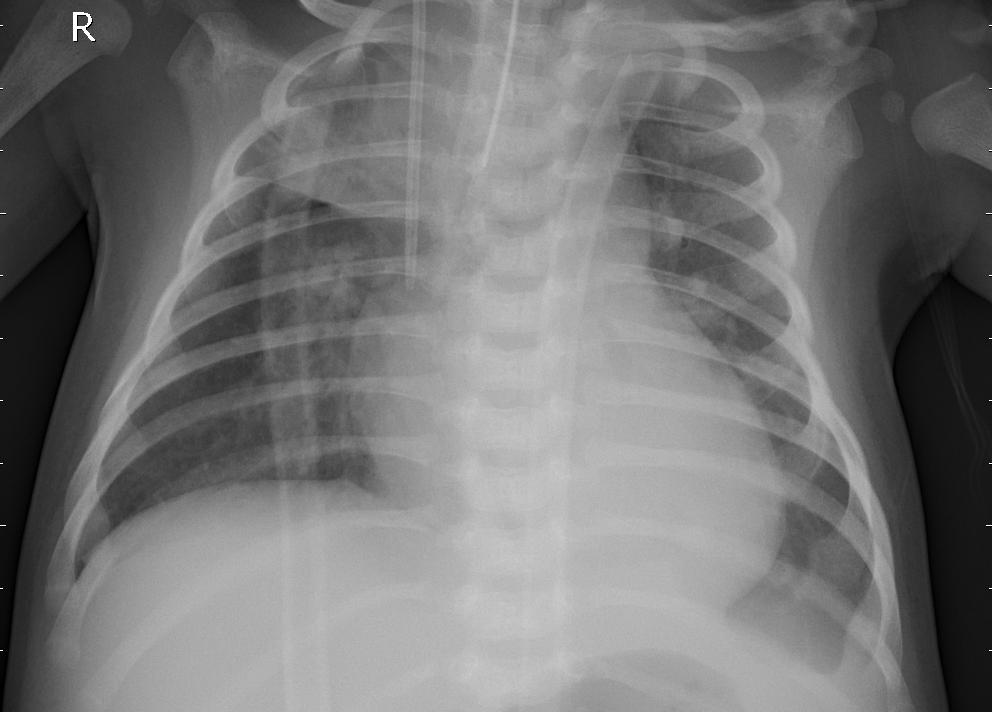

In [ ]:
# Let's view an image
from IPython.display import Image
Image(filename[1111])

In [ ]:
import os
# 'Yes' if len(os.listdir('/content/drive/My Drive/Pnemonia classification/traindata')) == len(filename) else 'No'

In [ ]:
len(os.listdir('/content/drive/My Drive/Pnemonia classification/traindata'))

5232

## Creating our own validation set

In [ ]:
# Setup X and y variables
X = filename # Here we define the features as the path
y = boolean_target # Boolean target as the labels

In [ ]:
# Set number of target to use for experimenting
NUM_IMAGES = 1000 #@param {type:'slider', min:1000, max:5232, step:2}

# Let's split our data into train and validation set
from sklearn.model_selection import train_test_split

# Split into train and val data of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
X_train[:5], y_train[:5]

(['/content/drive/My Drive/Pnemonia classification/traindata/person348_virus_719.jpeg',
  '/content/drive/My Drive/Pnemonia classification/traindata/person1405_bacteria_3571.jpeg',
  '/content/drive/My Drive/Pnemonia classification/traindata/person296_virus_613.jpeg',
  '/content/drive/My Drive/Pnemonia classification/traindata/person1337_virus_2307.jpeg',
  '/content/drive/My Drive/Pnemonia classification/traindata/person1472_bacteria_3833.jpeg'],
 [array([False,  True]),
  array([False,  True]),
  array([False,  True]),
  array([False,  True]),
  array([False,  True])])

In [ ]:
print(X_train)

['/content/drive/My Drive/Pnemonia classification/traindata/person348_virus_719.jpeg', '/content/drive/My Drive/Pnemonia classification/traindata/person1405_bacteria_3571.jpeg', '/content/drive/My Drive/Pnemonia classification/traindata/person296_virus_613.jpeg', '/content/drive/My Drive/Pnemonia classification/traindata/person1337_virus_2307.jpeg', '/content/drive/My Drive/Pnemonia classification/traindata/person1472_bacteria_3833.jpeg', '/content/drive/My Drive/Pnemonia classification/traindata/NORMAL2-IM-0414-0001.jpeg', '/content/drive/My Drive/Pnemonia classification/traindata/person1005_virus_1688.jpeg', '/content/drive/My Drive/Pnemonia classification/traindata/person1514_bacteria_3964.jpeg', '/content/drive/My Drive/Pnemonia classification/traindata/person1372_bacteria_3502.jpeg', '/content/drive/My Drive/Pnemonia classification/traindata/person1657_bacteria_4400.jpeg', '/content/drive/My Drive/Pnemonia classification/traindata/person266_bacteria_1237.jpeg', '/content/drive/My 

In [ ]:
# Convert image into np array
from matplotlib.pyplot import imread

image = imread(filename[42])
image.shape

(800, 1016)

In [ ]:
image.max(), image.min()

(255, 0)

In [ ]:
image

array([[97, 96, 94, ..., 95, 94, 94],
       [96, 95, 93, ..., 94, 93, 93],
       [94, 93, 92, ..., 93, 93, 93],
       ...,
       [33, 37, 44, ..., 26, 27, 22],
       [31, 37, 45, ..., 26, 27, 22],
       [29, 36, 45, ..., 26, 27, 22]], dtype=uint8)

Now we've seen what an image looks like. Let's make a function to preprocessing them


In [ ]:
# Define the image size
IMG_SIZE = 224

# Create a function for preprocessing images.
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image filepath and turns the image into tensor
  """

  # Read the image file
  image = tf.io.read_file(image_path)

  # Turn the jpeg image into numerical tensor with 2 color channels
  image = tf.image.decode_jpeg(image, channels=3)

  # Convert the color channel value to float values
  image = tf.image.convert_image_dtype(image, tf.float32)

  # Resize the image to our desired value (640, 640)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

In [ ]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Take an image filepath and the associated label,
  process that image and return the tuples
  """
  image = process_image(image_path) # Image as the tensor
  return image, label


In [ ]:
# Define the batch size 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size = BATCH_SIZE, valid_data = False, test_data = False):
  """
  Create batches of rom keras.model import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D())data out of image (X) and label(y) paris.
   Shuffles the data if it's tranning but dosen't shuffle if it's validation data.
   Also accepts test data as input (no labels)
  """

  # If the data is a test dataset, we probably don't have labels.
  if test_data:
    print('Creating test data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # Only file path as it test data.
    data_batch = data.map(process_image).batch(BATCH_SIZE) # split the test data into 32 batches
    return data_batch

  # If the data is valid dataset , we don't need to shuffles it
  elif valid_data:
    print("Creating validation data batches.....")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # Filepath
                                               tf.constant(y))) # Labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  # If the data is train dataset, we shuffled it.
  else:
    print("Creating traning data batches....")
    # Turn filepath and labels into tensor
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathname and labels before mapping image processor function is faster tha shuffling the images.
    data = data.shuffle(buffer_size=(len(X))) #buffer_size: A tf.int64 scalar tf.Tensor, representing the number of elements from this dataset from which the new dataset will sample.

    data_batch = data.map(get_image_label).batch(BATCH_SIZE)

  return data_batch

In [ ]:
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating traning data batches....
Creating validation data batches.....


In [ ]:
# Check our the different attributes our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 2), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 2), dtype=tf.bool, name=None)))

## Create a CNN model

In [ ]:
# Set up input shpae of the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # From above element_spec

# Set up output shape of the model
OUTPUT_SHAPE = len(uniqueTarget)

MODEL_URL = 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4'

In [ ]:
# import tensorflow as tf
# import tensorflow_hub as hub
# from tensorflow.keras import layers


# # Create a fuction which build a Keras model.
# def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url = MODEL_URL):
#   print('Building the model with :' , model_url)

#   # Setup the model layers
#   model = tf.keras.Sequential()
#   model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
#   model.add(layers.MaxPooling2D((2, 2)))
#   model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#   model.add(layers.MaxPooling2D((2, 2)))
#   model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#   model.add(layers.MaxPooling2D((2, 2)))

# # Flatten the output from the convolutional layers
#   model.add(layers.Flatten())

# # Add the fully connected layers
#   model.add(layers.Dense(128, activation='relu'))


#   # Compile the model
#   model.compile(
#       loss= tf.keras.losses.BinaryCrossentropy(),
#       optimizer = tf.keras.optimizers.Adam(),
#       metrics=['accuracy']
#   )

#   # Build the model
#   model.build(input_shape)

#   return model


import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

def create_model(input_shape=(224, 224, 3), output_shape=OUTPUT_SHAPE, model_url='https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4'):
    print('Building the model with:', model_url)

    # Setup the model layers
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(output_shape, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    model.build(input_shape)

    return model




In [ ]:
model = create_model()
model.summary()

Building the model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 64)       0         
 2D)                     

In [ ]:
# Load Tensor notbook extension
%load_ext tensorboard

In [ ]:
import datetime
import os

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():

  # Create a log directory for storing the tenosr board logs.
  logdir = os.path.join('/content/drive/My Drive/Pnemonia classification/logs',
                        datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
# Create early stopping  callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=3,
                                                  restore_best_weights=True)


In [ ]:
NUM_EPOCHS = 15 #@param {type:'slider', min:10, max:100, step:5}

In [ ]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a give model and returns the trained version.
  """
  # Create a model
  model = create_model()


  # Create new TensorBoard session every time we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callback we created
  history = model.fit(x= train_data,
            epochs=NUM_EPOCHS,
            validation_data = val_data,
            validation_freq = 1,
            callbacks = [tensorboard, early_stopping])

  return [model, history]

In [ ]:
trained_model, training_history = train_model()

# Access the trained model and history
model = trained_model
history = training_history

Building the model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/15
25/25 [==============================] - 125s 3s/step - loss: 0.8421 - accuracy: 0.7262 - val_loss: 0.4195 - val_accuracy: 0.8550
Epoch 2/15
25/25 [==============================] - 14s 559ms/step - loss: 0.2772 - accuracy: 0.8925 - val_loss: 0.2107 - val_accuracy: 0.9100
Epoch 3/15
25/25 [==============================] - 14s 554ms/step - loss: 0.1473 - accuracy: 0.9450 - val_loss: 0.3045 - val_accuracy: 0.8750
Epoch 4/15
25/25 [==============================] - 14s 549ms/step - loss: 0.0969 - accuracy: 0.9688 - val_loss: 0.2381 - val_accuracy: 0.9200
Epoch 5/15
25/25 [==============================] - 14s 567ms/step - loss: 0.0611 - accuracy: 0.9800 - val_loss: 0.1943 - val_accuracy: 0.9200
Epoch 6/15
25/25 [==============================] - 13s 508ms/step - loss: 0.0496 - accuracy: 0.9800 - val_loss: 0.2679 - val_accuracy: 0.9100
Epoch 7/15
25/25 [=============================

In [ ]:
%tensorboard --logdir drive/My Drive/Pnemonia classification/logs10

ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
2023-07-16 04:37:28.906063: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--reuse_port BOOL] [--load_fast {false,auto,true}]
                   [--extra_data_server_flags EXTRA_DATA_SERVER_FLAGS]
                   [--grpc_creds_type {local,ssl,ssl_dev}]
                   [--grpc_data_provider PORT] [--purge_orphaned_data BOOL]
                   [--db URI] [--db_import] [--inspect] [--version_tb]
                   [--tag TAG] [--event_file PATH] [--path_prefix PATH]
                   [--window_title TEXT] [--max_reload_threads COUNT]
                   [--reload_interval SECONDS] [--reload_task TYPE]
                   [--reload_multifile BOOL]
                   [--reload_multifile_inactive_secs SECONDS]

In [ ]:
prediction = model.predict(val_data, verbose=True)

7/7 [==============================] - 3s 464ms/step


In [ ]:
from PIL import Image

from matplotlib.pyplot import imread
processed_image = process_image('/content/drive/MyDrive/Pnemonia classification/traindata/IM-0115-0001.jpeg')


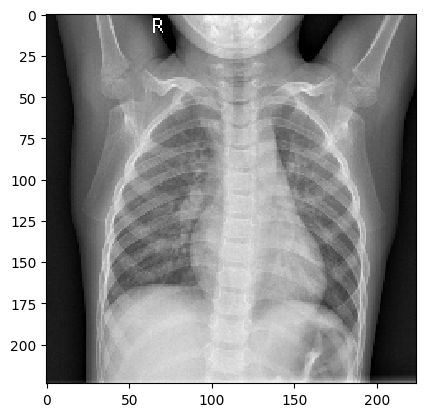

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(processed_image, interpolation='nearest')
plt.show()

In [ ]:
# labels_csv.id('IM-0115-0001.jpeg')
labels_csv.loc[labels_csv['id'] == 'IM-0115-0001.jpeg']

,id,target
4330,IM-0115-0001.jpeg,0


In [ ]:
processed_image = tf.reshape(processed_image, [1, 224, 224, 3])

In [ ]:
prediction = model.predict(processed_image)

1/1 [==============================] - 0s 206ms/step


In [ ]:
uniqueTarget[np.argmax(prediction)]

0

In [ ]:
!pip3 install pyyaml h5py

In [ ]:
model.save('/content/drive/MyDrive/Pnemonia classification/pTrainModel11' + '.keras')

In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf
import tensorflow
from tensorflow.keras.models import load_model


In [ ]:
new_model = load_model('/content/drive/MyDrive/Pnemonia classification/pTrainModel11.keras', custom_objects={'KerasLayer':hub.KerasLayer})
#pTrainedModel11 is using pooling and all cnn architecturess
# Check its architecture
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 27, 27, 64)       0         
 2D)                                                             
                                                      

In [ ]:
new_model.predict(processed_image
)

1/1 [==============================] - 0s 72ms/step


array([[0.9950558 , 0.00494423]], dtype=float32)

In [ ]:
model_json = model.to_json()

# Save the model architecture to a file
with open("/content/drive/MyDrive/Pnemonia classification/model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
# from tensorflow.python.saved_model.save import save
# model.save('/content/drive/MyDrive/Pnemonia classification/pTrainModel1' + '.h5')

In [ ]:
# X_train = np.array(X_train)
# # y_train = np.array(y_train)
# X_val = np.array(X_val)
# # y_val = np.array(y_val)

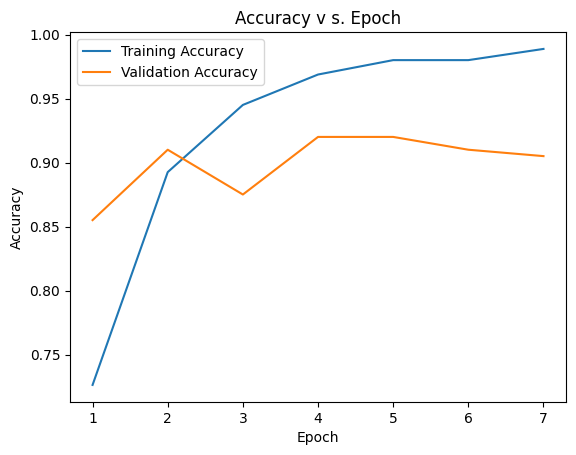

In [ ]:


import matplotlib.pyplot as plt

# Access the training and validation accuracy values from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Get the number of epochs
epochs = range(1, len(train_accuracy) + 1)

# Plot the training and validation accuracy
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Accuracy v s. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Read the test data from the CSV file
test_data = pd.read_csv('/content/drive/My Drive/Pnemonia classification/temptestLabels.csv')



# Extract the image names (X_test) and targets (y_true) from the test data
X_test = test_data['id']
y_true = test_data['target']

image_path =[(f'/content/drive/My Drive/Pnemonia classification/testdata/{item}' ) for item in X_test ]

X_test = [process_image(image) for image in image_path]


X_test

X_test = tf.reshape(X_test, [-1, 224, 224, 3])

# # Assuming you have a test set with image names and targets

# # Make predictions on the test set using your trained model
# y_pred = model.predict(X_test)
# y_pred_labels = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

# # Calculate the confusion matrix
# cm = confusion_matrix(y_true, y_pred_labels)

# # Define class labels
# class_labels = ['Normal', 'Pneumonia']  # Replace with your class labels

# # Plot the confusion matrix
# plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
# plt.title('Confusion Matrix')
# plt.colorbar()
# tick_marks = np.arange(len(class_labels))
# plt.xticks(tick_marks, class_labels, rotation=45)
# plt.yticks(tick_marks, class_labels)
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')

# # Add values to each cell
# for i in range(len(class_labels)):
#     for j in range(len(class_labels)):
#         plt.text(j, i, cm[i, j], ha='center', va='center', color='white')

# plt.show()


20/20 [==============================] - 1s 27ms/step


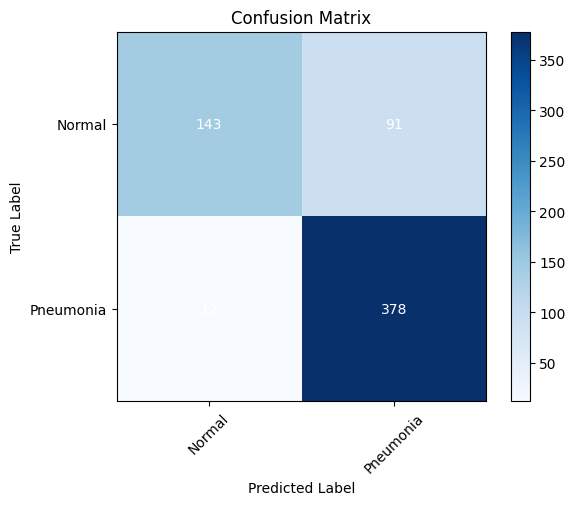

In [ ]:
X_test = tf.reshape(X_test, [-1, 224, 224, 3])
# Assuming you have a test set with image names and targets

# Make predictions on the test set using your trained model
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred_labels)

# Define class labels
class_labels = ['Normal', 'Pneumonia']  # Replace with your class labels

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add values to each cell
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white')

plt.show()



In [ ]:
# Calculate the total number of samples
total_samples = np.sum(cm)

# Calculate the number of correctly classified samples
correct_predictions = np.trace(cm)

# Calculate the accuracy
accuracy = correct_predictions / total_samples

print("Accuracy:", accuracy)


Accuracy: 0.8349358974358975


In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 27, 27, 64)       0         
 2D)                                                             
                                                      